# Домашнее задание № 3
Дисциплина - Python для инженерии данных  
Тема 3. Библиотеки NumPy и Pandas. Визуализация данных

### Задание 1  
На основании датасета <a href="https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024" target="_bank">`Electronic_sales_Sep2023-Sep2024.csv`</a> для каждого покупателя получите:  
•	предпочитаемый метод оплаты;  
•	общие траты;  
•	количество денег, потраченных на дополнительные услуги и аксессуары. 

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
data.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [3]:
data.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


1. Найдём статистику по всем методам оплаты для каждого покупателя

In [4]:
preferred_methods = {customer_id: group['Payment Method'].value_counts()
                     for customer_id, group in data.groupby('Customer ID')}


for customer_id, method in list(preferred_methods.items())[25:30]:
    print(f"Покупатель {customer_id}: {method}")

Покупатель 1035: Payment Method
Cash    2
Name: count, dtype: int64
Покупатель 1036: Payment Method
Debit Card    1
Paypal        1
Name: count, dtype: int64
Покупатель 1038: Payment Method
Debit Card    2
Paypal        1
Cash          1
Name: count, dtype: int64
Покупатель 1039: Payment Method
Credit Card    1
Name: count, dtype: int64
Покупатель 1040: Payment Method
Credit Card    1
Name: count, dtype: int64


2. Теперь оставим лишь те методы, частота которых максимальна. Это ответ на первый вопрос задачи.

In [5]:
def keep_max(method):
    max_count = method.max()
    return method[method == max_count]

preferred_methods = {customer_id: keep_max(method) for customer_id, method in preferred_methods.items()}
for customer_id, method in list(preferred_methods.items())[25:30]:
    print(f"Покупатель {customer_id}: {method}")

Покупатель 1035: Payment Method
Cash    2
Name: count, dtype: int64
Покупатель 1036: Payment Method
Debit Card    1
Paypal        1
Name: count, dtype: int64
Покупатель 1038: Payment Method
Debit Card    2
Name: count, dtype: int64
Покупатель 1039: Payment Method
Credit Card    1
Name: count, dtype: int64
Покупатель 1040: Payment Method
Credit Card    1
Name: count, dtype: int64


3. Теперь рассчитаем общие траты каждого покупателя. Дополнительно отсортируем результат по убыванию трат.

In [6]:
money_spent = data.groupby('Customer ID')['Total Price'].sum().reset_index()
money_spent = money_spent.rename(columns={'Total Price': 'Total Spent'})
money_spent = money_spent.sort_values('Total Spent', ascending=False)
money_spent.head(10)

,Customer ID,Total Spent
9728,16357,34563.70
10049,16863,33035.92
8060,13813,31830.16
6475,11476,31077.61
7028,12276,30961.18
7935,13635,30260.36
7352,12749,29394.56
9087,15399,29084.88
7054,12319,27352.32
12133,19996,27296.78


4. А теперь высчитаем только количество денег, потраченных на дополнительные услуги и аксессуары. Добавим это в таблицу money_spent ещё одним столбцом `Addons Money`.

In [7]:
addons_money = data.groupby('Customer ID')['Add-on Total'].sum().reset_index()
addons_money = addons_money.rename(columns={'Add-on Total': 'Addons Money'})

money_spent = pd.merge(money_spent, addons_money, on='Customer ID', how='left')
money_spent.head(10)

,Customer ID,Total Spent,Addons Money
0,16357,34563.70,495.19
1,16863,33035.92,486.17
2,13813,31830.16,268.64
3,11476,31077.61,301.59
4,12276,30961.18,329.07
5,13635,30260.36,480.73
6,12749,29394.56,619.43
7,15399,29084.88,305.39
8,12319,27352.32,226.38
9,19996,27296.78,432.12


### Задание 2  
1. На основании датасета получите доход:  
•	по каждому методу доставки,  
•	по каждому типу продукта,  
•	по дополнительным услугам за каждый месяц,  
•	по дополнительным услугам за каждый квартал.  
  
2. Отобразите полученные данные на графике.

Для ответа на данные вопросы понадобится ввести два дополнительных столбца - месяц покупки и квартал покупки.

In [8]:
data['Month'] = pd.to_datetime(data['Purchase Date']).dt.to_period('M')
data['Quarter'] = pd.to_datetime(data['Purchase Date']).dt.to_period('Q')

Поскольку код получается довольно однообразным, напишем функцию, которая будет считать результат по выбранным параметрам

In [9]:
def parameter_revenue(parameter, money):
    revenue = data.groupby(parameter)[money].agg(['sum', 'count'])
    revenue = revenue.rename(columns={
    'sum': 'Total Sum',
    'count': 'Orders'
}).reset_index()
    return revenue

А теперь соберём статистику по каждому параметру:

In [10]:
result = {}
for parameter in ['Shipping Type', 'Product Type']:
    result[parameter] = parameter_revenue(parameter, 'Total Price')

result['Addons Monthly'] = parameter_revenue("Month", 'Add-on Total')
result['Addons Quarterly'] = parameter_revenue("Quarter", 'Add-on Total')

In [11]:
result['Shipping Type']

,Shipping Type,Total Sum,Orders
0,Expedited,12437526.21,3272
1,Express,8685215.62,3366
2,Overnight,8704828.17,3357
3,Same Day,12432024.82,3280
4,Standard,21343073.55,6725


In [12]:
result['Product Type']

,Product Type,Total Sum,Orders
0,Headphones,4041400.24,2011
1,Laptop,12296239.97,3973
2,Smartphone,21516754.69,5978
3,Smartwatch,14036273.06,3934
4,Tablet,11712000.41,4104


In [13]:
months = {i + 1: x for i, x in enumerate("Январь Февраль Март Апрель Май Июнь Июль Август Сентябрь Октябрь Ноябрь Декабрь".split())}

result["Addons Monthly"]["Month"] = result["Addons Monthly"]["Month"].apply(lambda x: f"{months[x.month]} {x.year}")
result['Addons Monthly']

,Month,Total Sum,Orders
0,Сентябрь 2023,8012.62,190
1,Октябрь 2023,37837.12,911
2,Ноябрь 2023,34888.81,797
3,Декабрь 2023,33509.15,800
4,Январь 2024,136195.16,2049
5,Февраль 2024,120148.92,1818
6,Март 2024,124954.26,1957
7,Апрель 2024,123973.59,1932
8,Май 2024,132018.51,2048
9,Июнь 2024,126689.59,1999


In [14]:
quarters = {i: f"{i}-й квартал" for i in range(1, 5)}

result["Addons Quarterly"]["Quarter"] = result["Addons Quarterly"]["Quarter"].apply(lambda x: f"{quarters[x.quarter]} {x.year}")
result['Addons Quarterly']

,Quarter,Total Sum,Orders
0,3-й квартал 2023,8012.62,190
1,4-й квартал 2023,106235.08,2508
2,1-й квартал 2024,381298.34,5824
3,2-й квартал 2024,382681.69,5979
4,3-й квартал 2024,366669.23,5499


Также создадим громоздкую, но универсальную функцию рисования столбчатой диаграммы

In [15]:
def draw_func(column, parameter, str_param):
    table = result[column]
    plt.figure(figsize=(12, 6))

    # График общей суммы
    plt.subplot(1, 2, 1)
    plt.plot(table[parameter], table['Total Sum'], marker='o', linewidth=2, markersize=8, color='#1f77b4')
    plt.title(f'Общая сумма по: {str_param}', fontsize=14, fontweight='bold')
    plt.ylabel('Сумма ($)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # График количества заказов
    plt.subplot(1, 2, 2)
    plt.plot(table[parameter], table['Orders'], marker='s', linewidth=2, markersize=8, color='#ff7f0e')
    plt.title(f'Количество заказов по: {str_param}', fontsize=14, fontweight='bold')
    plt.ylabel('Количество заказов')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

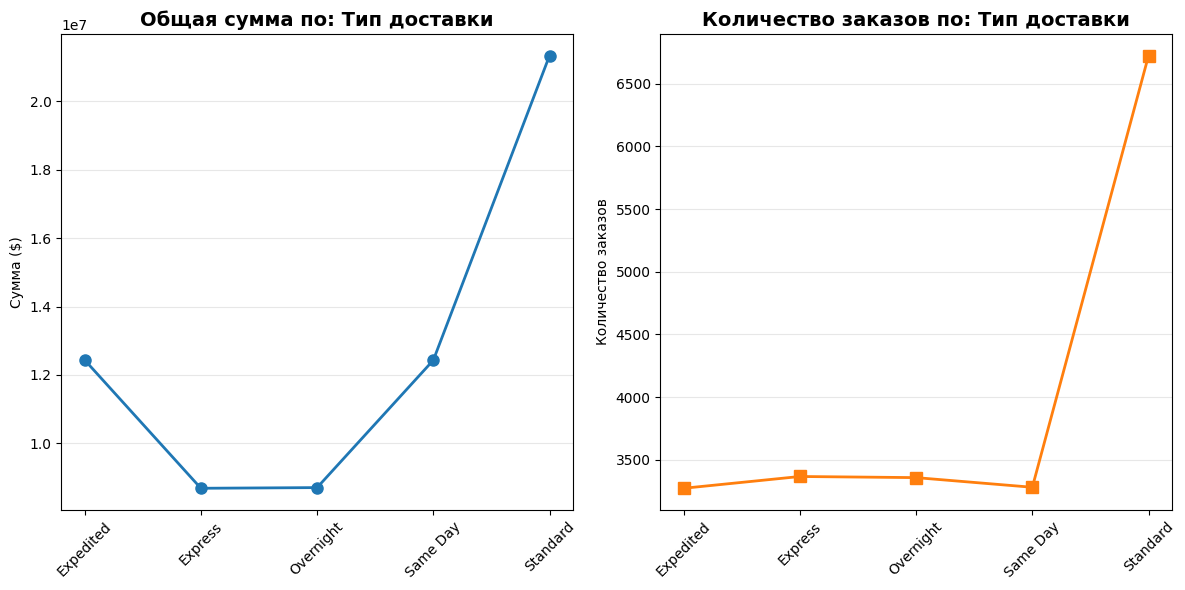

In [16]:
draw_func('Shipping Type', 'Shipping Type', 'Тип доставки')

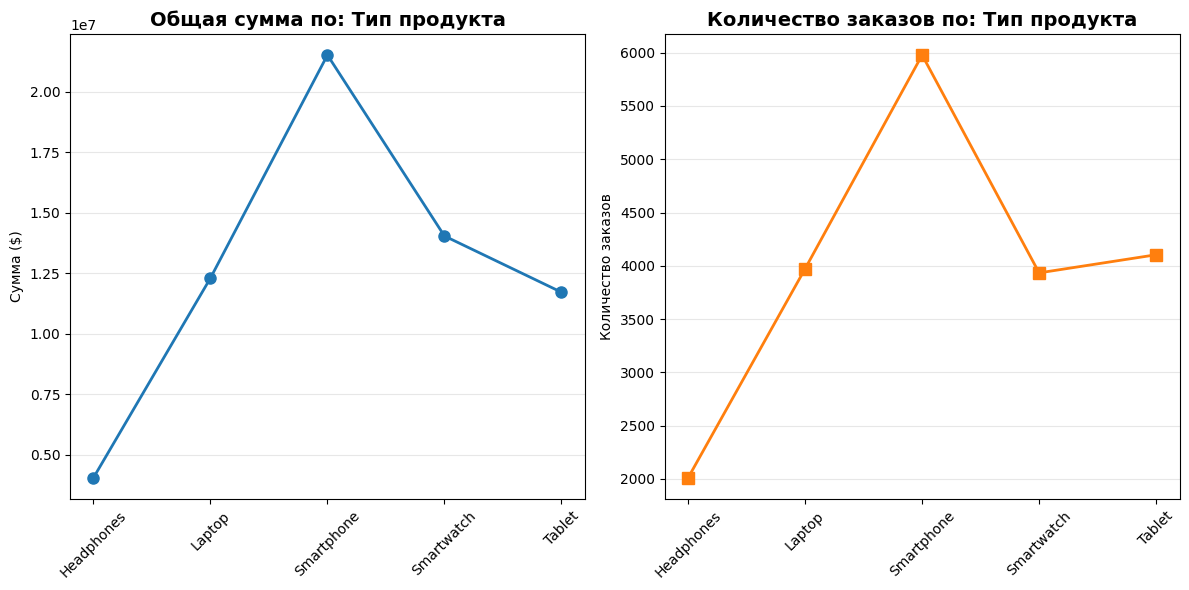

In [17]:
draw_func('Product Type', 'Product Type', 'Тип продукта')

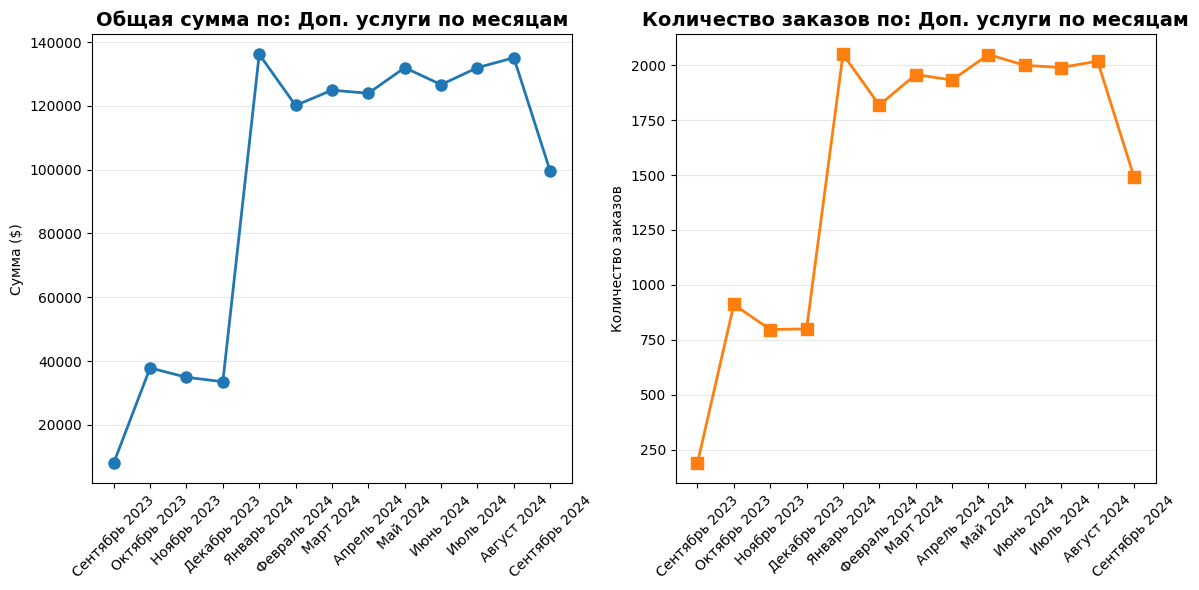

In [18]:
draw_func('Addons Monthly', 'Month', 'Доп. услуги по месяцам')

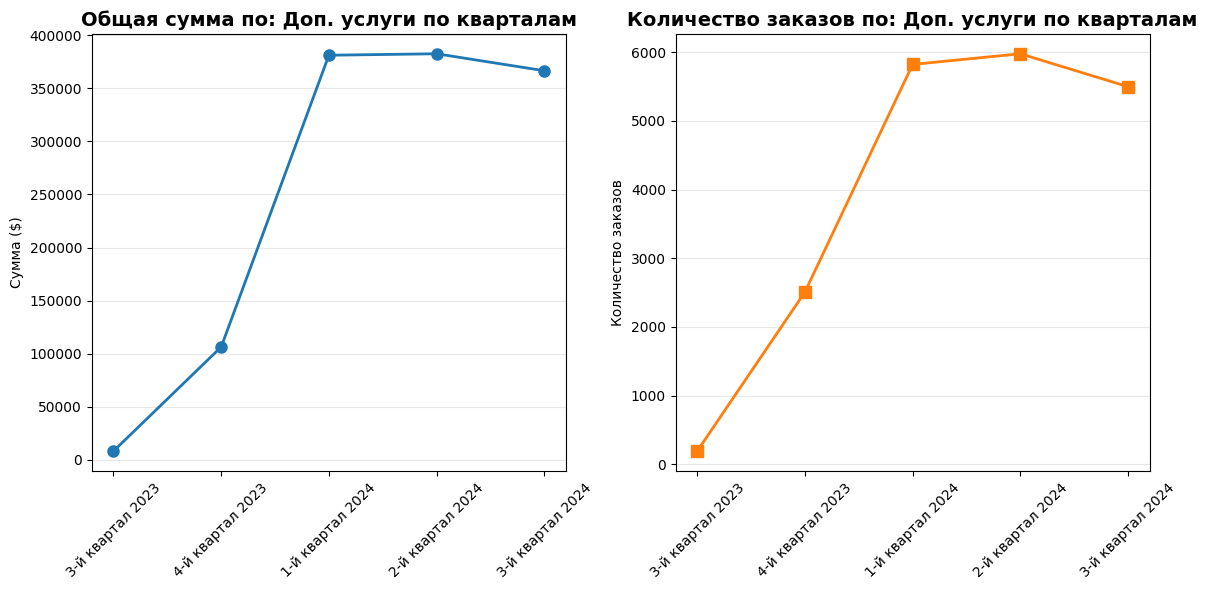

In [19]:
draw_func('Addons Quarterly', 'Quarter', 'Доп. услуги по кварталам')